<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Portfolio_Optimization(%EB%AF%B8%EA%B5%AD%EC%A3%BC%EC%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

효율적 투자선(=Efficient Frontier)과 파이썬(Python)을 이용하여 사용자 포트폴리오를 최적화하기

In [1]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

# 가상 포트폴리오 만들기

In [2]:
# 가상 포트폴리오에 대한 주식 가격 데이터와 티커를 가져오기
assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [3]:
# 가장 기본적인 포트폴리오를 구성
# 기본 포트폴리오는 각 주식이 동등한 가중치를 갖도록 설정
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 6.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=c8705bfc2fc409e7e7a79e9571972a760cae17c03a67fd2fff9d4a97a99c883e
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr

yf.pdr_override()

# 주식 시작일은 2013년 1월 1일이고 종료일은 현재 날짜 (오늘)로 설정
#Get the stock starting date
start_date = '01-01-2013'

# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%d-%m-%Y')


In [6]:
start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(today, '%d-%m-%Y')


In [7]:
'''
# 주식 시작일은 2013년 1월 1일이고 종료일은 현재 날짜 (오늘)로 설정
#Get the stock starting date
stockStartDate = '2013-01-01'

# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')
'''

"\n# 주식 시작일은 2013년 1월 1일이고 종료일은 현재 날짜 (오늘)로 설정\n#Get the stock starting date\nstockStartDate = '2013-01-01'\n\n# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD\ntoday = datetime.today().strftime('%Y-%m-%d')\n"

In [8]:
# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = pdr.get_data_yahoo(stock,data_source='yahoo',start=start , end=end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# 데이터프레임에 저장된 각 주식의 종가 살펴보기
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,19.608213,13.144286,360.274597
2013-01-03,27.770000,258.480011,19.360714,13.798571,360.483826
2013-01-04,28.760000,259.149994,18.821428,13.711429,367.607117
2013-01-07,29.420000,268.459991,18.710714,14.171429,366.003143
2013-01-08,29.059999,266.380005,18.761070,13.880000,365.280823
...,...,...,...,...,...
2021-07-02,354.700012,3510.979980,139.960007,533.979980,2574.379883
2021-07-06,352.779999,3675.739990,142.020004,541.640015,2595.419922
2021-07-07,350.489990,3696.580078,144.570007,535.960022,2601.550049


['FB' 'AMZN' 'AAPL' 'NFLX' 'GOOG']
['FB' 'AMZN' 'AAPL' 'NFLX' 'GOOG']
['FB' 'AMZN' 'AAPL' 'NFLX' 'GOOG']
['FB' 'AMZN' 'AAPL' 'NFLX' 'GOOG']
['FB' 'AMZN' 'AAPL' 'NFLX' 'GOOG']


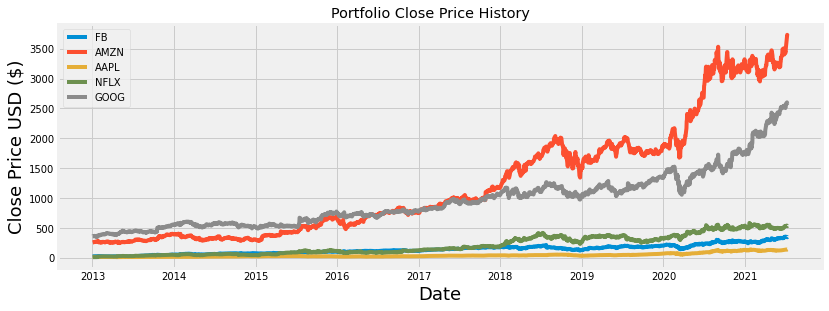

In [10]:
# 주식 가격이 시간에 따라 어떻게 변했는지 시각화하기
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Close Price History    '

#Get the stocks
my_stocks = df

#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:  # 종목 하나씩 반복
  plt.plot( my_stocks[c],  label=c) #plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  print(my_stocks.columns.values)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

# Financial Calculations


In [11]:
# (new_price +- old_price) / old_price 또는 (new_price / old_price)-1의 계산을 통해 
# 일일 단순 수익률을 표시
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-07-02,0.000875,0.022724,0.019596,0.000825,0.018600
2021-07-06,-0.005413,0.046927,0.014718,0.014345,0.008173
2021-07-07,-0.006491,0.005670,0.017955,-0.010487,0.002362


## 연간 공분산 행렬을 계산하고 출력
- 공분산 행렬은 서로 다른 모집단의 데이터 샘플을 비교할 때 통계에서 일반적으로 사용되는 수학적 개념
- 2개의 임의 변수가 얼마나 변하거나 함께 이동 하는지를 결정하는 데 사용됨
- 따라서, 공분산 행렬을 통해서 두 자산 가격간의 방향 관계를 알아 낼 수 있음
- 행렬의 대각선은 분산이고 다른 항목은 공분산
- 분산은 일련의 관측치가 서로 얼마나 다른지 측정
- 분산의 제곱근 = 표준 편차 (변동성)
- 연간 공분산 행렬을 표시하려면 공분산 행렬에 현재 연도의 거래 일수를 곱함 (연율화)
- 보통 연간 거래일수는 해마다 다르지만 250일 정도로 계산하면 얼추 비슷

In [12]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117054,0.054367,0.045146,0.056530,0.050266
AMZN,0.054367,0.091950,0.040108,0.062762,0.047086
AAPL,0.045146,0.040108,0.081422,0.035894,0.038560
NFLX,0.056530,0.062762,0.035894,0.206519,0.048771
GOOG,0.050266,0.047086,0.038560,0.048771,0.066054


## 포트폴리오 분산을 계산하고 출력
**포트폴리오 분산의 기대값 = WT * (공분산 행렬) * W**




In [13]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06087911977696962

## 포트폴리오 변동성을 계산하고 출력
**포트폴리오 변동성의 기대값 = SQRT (WT * (공분산 매트릭스) * W)**  
- 변동성(=표준 편차) = 분산의 제곱근

In [14]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.2467369444914353

## 포트폴리오 연간 단순 수익률을 계산하고 출력

In [15]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3583511060396176

## 포트폴리오의 예상 연간 수익률, 변동성 (Risk), 분산 출력

In [16]:
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_var = str(round(port_variance, 2) * 100) + '%'

print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 36.0%
Annual volatility/standard deviation/risk : 25.0%
Annual variance : 6.0%


# 포트폴리오 최적화

포트폴리오 최적화 = 최소한의 위험으로 수익을 최대화
- Robert Ansrew Martin이 만든 패키지를 이용하면, 포트폴리오를 쉽게 최적화 할 수 있다.
- Robert Ansrew Martin이 만든 PyPortfolioOpt라는 패키지를 사용해서 포트폴리오를 최적화


In [21]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 1.3MB 6.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736148 sha256=b652cb45f4e42da27c08702c636aee1ef4e2513ed8cb7d039369e7185ca57fdd
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [25]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## 예상 수익률과 일일 자산 수익률의 연간 표본 공분산 행렬을 계산

In [26]:
# returns.mean() * 252
mu = expected_returns.mean_historical_return(df) 

# Get the sample covariance matrix
S = risk_models.sample_cov(df)

## 최대 Sharpe Ratio를 최적화 ($Maximize\ Sharpe Ratio$)

In [27]:
ef = EfficientFrontier(mu, S)

# Maximize the Sharpe ratio, and get the raw weights
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 

# Note the weights may have some rounding error,
# meaning they may not add up exactly to 1 but should be close
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.15279), ('AMZN', 0.34647), ('AAPL', 0.18797), ('NFLX', 0.31177), ('GOOG', 0.001)])
Expected annual return: 40.1%
Annual volatility: 27.1%
Sharpe Ratio: 1.41


(0.40104788081356113, 0.27118124434062124, 1.4051409851005043)

**포트폴리오 최적화 결과 확인**  
- Facebook을 15.279%, Amazon을 34.647%, Apple을 18.797%, Netflix를 31.177%, Google을 0.1% 보유
- 최적화를 통해 예상 연간 수익이 36.0% -> 40.1%로 증가한 것을 확인
- 연간 변동성(Risk)은 25.0% -> 27.1%으로 늘어난 것을 확인.
- 최적화 된 포트폴리오는 1.41의 Sharpe 비율을 가지고 있습니다.

**Sharpe Ratio**  
- 1966년 William F. Sharpe에 의해 개발됨
- Sharpe Ratio는 더 위험한 자산을 보유하기 위해 견뎌야 하는 추가적인 변동성에 대해 얼마나 많은 초과 수익을 얻었는지를 나타냄
- 위험을 조정 한 후 무위험 자산(채권, 국채 등)과 비교하여 투자 성과를 측정함
- 투자 수익과 무위험 수익 간의 차이를 투자의 표준 편차로 나눈 값으로 정의됨

**상대적으로 적은 위험에 대해 높은 기대 수익률을 내는 투자 포트폴리오는?**  
- 일반적으로 1.0보다 큰 Sharpe Ratio는 괜찮은 포트폴리오로 간주됨.
- 2.0보다 높은 비율은 매우 좋음으로 평가됨
- 3.0 이상의 비율은 우수한 것으로 간주됨
- 1.0 미만의 비율은 차선책으로 간주됨

In [29]:
np.sum(weights)

OrderedDict([('FB', 0.152793379951947),
             ('AMZN', 0.3464731196486135),
             ('AAPL', 0.1879663937368174),
             ('NFLX', 0.3117707707285562),
             ('GOOG', 0.0009963359340662)])

In [28]:
np.sum(cleaned_weights)

OrderedDict([('FB', 0.15279),
             ('AMZN', 0.34647),
             ('AAPL', 0.18797),
             ('NFLX', 0.31177),
             ('GOOG', 0.001)])

In [30]:
cleaned_weights

OrderedDict([('FB', 0.15279),
             ('AMZN', 0.34647),
             ('AAPL', 0.18797),
             ('NFLX', 0.31177),
             ('GOOG', 0.001)])

In [37]:
cleaned_weights['FB'] + cleaned_weights['AMZN'] + cleaned_weights['AAPL'] + cleaned_weights['NFLX'] + cleaned_weights['GOOG']

1.0

# 투자비용에 따른 종목별 매수 수량 계산
- 위의 비율에 따라서 포트폴리오를 구성할때, 종목별 몇주씩 매수를 해야 하는지 알고싶습니다.
- 즉, 이 포트폴리오에서 각 종목의 할당(discrete allocation)을 정확히 알고 싶습니다.

- 예를 들어, 이 포트폴리오에 $15,000 를 투자한다고 할때, 최적의 결과를 제공하기 위해 포트폴리오에서 각 주식을 몇주씩 매수해야 할지 알고 싶은 것

- 포트폴리오에서 종목의 할당을 계산하기 위해서는 다음과 같이 pulp라는 라이브러리 설치

In [38]:
!pip install pulp

     |████████████████████████████████| 40.6MB 77kB/s 


## 각 주식의 개별 할당 계산

In [39]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights 

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 7, 'AMZN': 1, 'AAPL': 20, 'NFLX': 9}
Funds remaining: $1101.70
